<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/ACD_T10_Outros_Modelos_Sup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE I: Classificação

In [ ]:
# Importando as bibliotecas necessárias (pandas , numby e todas os modelos classificatórios da lib SciKit Learn)

#Pandas para ler o arquivo em CSV e Numpy para tratamento de matrizes (algebra linear)
import pandas as pd
import numpy as np

#Modelos de Classificação da Lib SciKit Lean

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Divisão da base entre o treino e teste do modelo

from sklearn.model_selection import train_test_split

In [ ]:
#importando a base de dados do github , tirando as colunas de id para não "poluir" os modelos ((index_col=0))

x = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv',index_col=0)
x.head(10)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [ ]:
#selecionando somente as colunas de interesse para aplicação do modelo especificadas pelo professor

y = x[['Type','Min.Price', 'Price','Max.Price','MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Width','Weight']]

colunas_selecionadas=['Type','Min.Price', 'Price','Max.Price','MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Width','Weight']

df=y[colunas_selecionadas]

df.head()

,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Width,Weight
1,Small,12.9,15.9,18.8,25,31,1.8,140,6300,68,2705
2,Midsize,29.2,33.9,38.7,18,25,3.2,200,5500,71,3560
3,Compact,25.9,29.1,32.3,20,26,2.8,172,5500,67,3375
4,Midsize,30.8,37.7,44.6,19,26,2.8,172,5500,70,3405
5,Midsize,23.7,30.0,36.2,22,30,3.5,208,5700,69,3640


In [ ]:
# Verificação da base de dados para checagem se há dados NaN 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 11 columns):
Type           93 non-null object
Min.Price      93 non-null float64
Price          93 non-null float64
Max.Price      93 non-null float64
MPG.city       93 non-null int64
MPG.highway    93 non-null int64
EngineSize     93 non-null float64
Horsepower     93 non-null int64
RPM            93 non-null int64
Width          93 non-null int64
Weight         93 non-null int64
dtypes: float64(4), int64(6), object(1)
memory usage: 8.7+ KB


In [ ]:
#Aplicação de treino e teste para inputs nos modelos

X=df[['Min.Price', 'Price','Max.Price','MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Width','Weight']] 
y=df['Type']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
# Em X somente as colunas que não queremos fornecer para o modelo realizar as classificações
# Em y a Variável Resposta que queremos que o modelo classifique

In [ ]:
#Criando uma instância para os modelos e caso todos os modelos sejam rodados , retornar uma mensagem

models=[]
models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Modelos Rodados')

Modelos Rodados


In [ ]:
# Colocando como métrica de classificação o K-Fold em todos os modelos para retorno das acurácias

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 52.38095238095239
Naive Bayes: 61.42857142857142
K-Nearest Neighbour: 46.19047619047619
Decision Tree: 61.9047619047619
Support Vector Machine-linear: 62.61904761904762
Support Vector Machine-rbf: 21.428571428571427
Random Forest: 62.14285714285715
MLP: 18.57142857142857
AdaBoostClassifier: 23.57142857142857
GradientBoostingClassifier: 70.0


In [ ]:
# Melhor Modelo: GradientBoostingClassifier: 70.0% de acurácia utilizando a técnica de K-fold para scoragem.

# PARTE II: Regressão Linear com o Maior R-Squared (Coeficiente de Spearmann) na Base

In [ ]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importando a base de dados do github , tirando as colunas de id ((index_col=0))
x = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv',index_col=0)
x.head(10)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [ ]:
#selecionando somente as colunas de interesse para aplicação do modelo especificadas pelo professor

y = x[['Type','Min.Price', 'Price','Max.Price','MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Width','Weight']]

colunas_selecionadas=['Type','Min.Price', 'Price','Max.Price','MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Width','Weight']

data=y[colunas_selecionadas]

data.head()

,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Width,Weight
1,Small,12.9,15.9,18.8,25,31,1.8,140,6300,68,2705
2,Midsize,29.2,33.9,38.7,18,25,3.2,200,5500,71,3560
3,Compact,25.9,29.1,32.3,20,26,2.8,172,5500,67,3375
4,Midsize,30.8,37.7,44.6,19,26,2.8,172,5500,70,3405
5,Midsize,23.7,30.0,36.2,22,30,3.5,208,5700,69,3640


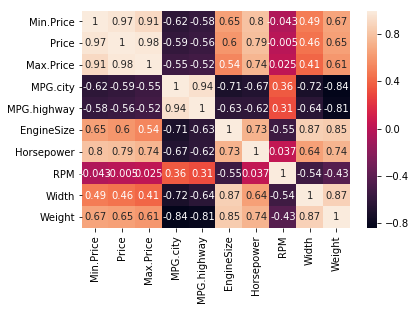

In [ ]:
#Análise de correlação generalizada entre todas variáveis de input do modelo

z = data.copy()
sns.heatmap(data = z.corr(), annot = True)
plt.show()

In [ ]:
#Como a correlação entre as variáveis Price vs Min.Price possuem uma alta correlação,selecionamos somente elas para o data set

a = x[['Type','Min.Price', 'Price','Max.Price','MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Width','Weight']]

colunas_selecionadas_v2=['Price','Min.Price']

data=a[colunas_selecionadas_v2]

data.head()

# MELHOR R-SQUARED DE COMBINAÇÃO PRICE VS MIN.PRICE

,Price,Min.Price
1,15.9,12.9
2,33.9,29.2
3,29.1,25.9
4,37.7,30.8
5,30.0,23.7


In [ ]:
# Variável Depedendente vs Independente

X=data.iloc[:,0].values #Min.Price
y=data.iloc[:,1].values # Price (Variável Preditora)

X=X.reshape(-1,1)

In [ ]:
# Cálculo de correlação entre as duas variáveis escolhidas

data['Price'].corr(data['Min.Price'])

0.9706014017830373

In [ ]:
#Aplicando o modelo de regressao

regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# b0  (coeficientes)

regressor.coef_

array([0.87882084])

In [ ]:
#b1 (intercepto - coeficientes)

regressor.intercept_

-0.019704585406365993

Text(0,0.5,'Price')

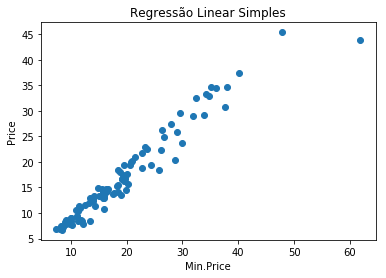

In [ ]:
# Visualizando as duas variáveis em um gráfico

plt.scatter(X,y)
plt.title('Regressão Linear Simples')
plt.xlabel('Min.Price')
plt.ylabel('Price')